# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()
data.duplicated().sum()

0

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

   children  number_clients  clients_arrears  probability_delay
0         0           14091             1063           0.075438
1         1            4808              444           0.092346
2         2            2052              194           0.094542
3         3             330              303           0.918182
4         4              41               37           0.902439
5         5               9                0           0.000000


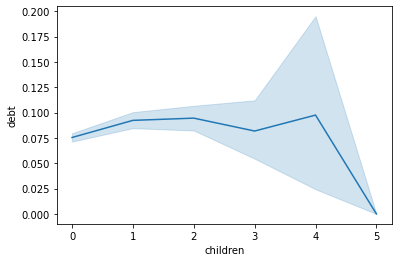

In [22]:
import seaborn as sns
sns.lineplot(x = data['children'], y = data['debt'])
#print(data.groupby('children')['debt'].value_counts())
#print(data['children'].value_counts().sort_values())
data_pt = data.pivot_table(index=['children'], values ='debt', aggfunc='count')
data_pt['clients_arrears'] = [1063, 444, 194, 303, 37, 0]
data_pt['probability_delay'] = data_pt['clients_arrears'] / data_pt['debt']
data_pt = data_pt.rename(columns={'debt' : 'number_clients'})
print(data_pt.reset_index())
# Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:** 
Судя по данным зависимость между количеством детей и возвратом кредитов в срок является не большой, клиенты с 1-2 детьми немного чаще задерживают выплаты чем клиенты у которых нет детей или имеющих троих детей, резкие перепады там где количество детей четверо и пятеро можно объяснить малым количеством выборки (для четырех детей количество клиентов взявших кредит составляет 41, а для пяти равняется 9) делать по ним выводы нельзя.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

   family_status_id      debt  number_clients
0                 0  0.075606           12261
1                 1  0.093130            4134
2                 2  0.066246             951
3                 3  0.070648            1189
4                 4  0.097639            2796


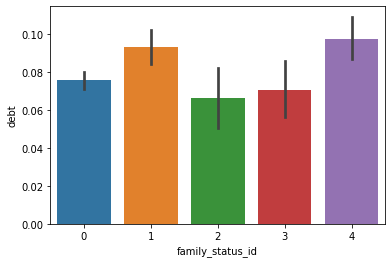

In [23]:
sns.barplot(x = data['family_status_id'], y = data['debt'])
data_f_id = data.pivot_table(index=['family_status_id'], values ='debt')
data_f_id['number_clients'] = data['family_status_id'].value_counts()
print(data_f_id.reset_index())
#print(data.groupby('family_status_id')['children'].value_counts()) #разбивка по количеству детей и семейному положению для проверки связи возврата кредитов
#print(data['family_status_id'].value_counts().sort_values()) #количество выборки по категориям 
#print(data.groupby('family_status_id')['total_income'].median())#медиана дохода по семейному положению
#print(data.head(10))
#print(data.groupby('family_status_id')['dob_years'].median()) #медиана по возрасту 
#print(data.groupby('purpose_category')['family_status_id'].value_counts()) # цели кредита по категориям
#print(data.groupby('family_status_id')['total_income_category'].value_counts()) #разбивка по категориям дохода 
# Ваш код будет здесь. Вы можете создавать новые ячейки.


 **Семейным положением (family_status_id)** 
- женат / замужем - 0
- гражданский брак - 1
- вдовец / вдова - 2
- в разводе - 3
- не женат / не замужем - 4

**Вывод:** Люди в категории "гражданский брак" и "не женат / не замужем" чаще задерживают выплаты по кредитам чем остальные.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

   debt   total_income
0     0  165713.065105
1     1  161152.278868
  total_income_category      debt  total_income_median  number_clients
0                     A  0.080000              1223042              25
1                     B  0.070602               257558            5014
2                     C  0.084982               130355           15921
3                     D  0.060172                43929             349
4                     E  0.090909                26431              22


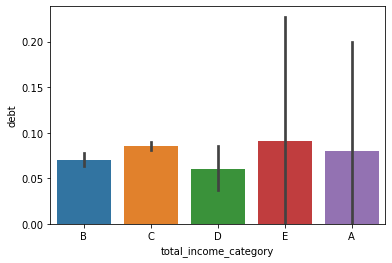

In [24]:
#print(data.groupby('debt')['total_income'].median()) # медиана по возвратам кредитов 
data_m = data.pivot_table(index=['debt'], values='total_income')
print(data_m.reset_index())
#print(data.groupby('total_income_category')['total_income'].median())#медиана по доходу 
#print(data['total_income_category'].value_counts().sort_values()) #кол.выборки по категориям 
sns.barplot(x = data['total_income_category'], y = data['debt'])
data_pivot = data.pivot_table(index=['total_income_category'], values='debt')
data_pivot['total_income_median'] = [1223042, 257558, 130355, 43929, 26431]
data_pivot['number_clients'] = data['total_income_category'].value_counts()
print(data_pivot.reset_index())

In [25]:
data_de_m = data.pivot_table(index=['total_income_category'], values='days_employed', aggfunc='median')
data_de_m['median_years'] = [43, 42, 43, 51, 56]
print(data_de_m.reset_index())

  total_income_category  days_employed  median_years
0                     A    2577.664662            43
1                     B    2082.452571            42
2                     C    1928.497368            43
3                     D    6700.810373            51
4                     E  347804.940429            56


**Вывод:**  Если смотреть на общие показатели разделив людей на группы есть или нет задолженности то разницу в среднем доходе мы почти не увидим. Если разбить их на категории по доходу то категории "B" реже задерживают выплаты чем в категории "С"  здесь скорее всего имеет значения разница в доходе.  Категория "D" имеет выборку горазда меньше чем категория "B" и "C" и вероятность ошибки в них больше, это могло повлиять на значения общего стажа работы и среднего возраста клиента, тут значения куда выше чем у клиентов со средним доходом и выше. Категория "А" и "Е" имеет не значительное количество выборки, делать даже приблизительные выводы нельзя.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

<AxesSubplot:xlabel='debt', ylabel='purpose_category'>

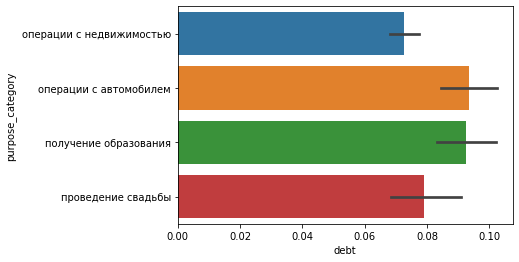

In [26]:
x = data['debt']
y = data['purpose_category']
sns.barplot(x = x, y = y)
#print(data.groupby('purpose_category')['debt'].value_counts()) 
#print(data.groupby('purpose_category')['total_income'].median()) # медианный доход по цели кредита 
#print(data.groupby('purpose_category')['total_income_category'].value_counts()) #выборка по категориям дохода
#print(data.head())  # Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:**  Люди берущие кредиты для улучшения жилищных условий и проведения свадьбы чаще возвращают кредиты в срок чем клиенты покупающие автомобиль и оплачивающие образование. Возможна здесь значение имеет сумма кредита, так для проведения свадьбы медиана кредита может быть наименьшей из всех, а для приобретения недвижимости наибольшей. Первые не имеют больших трудностей с выплатой в срок, вторые предпочитают не задерживать выплаты из-за больших штрафов. Но для уточнения этого нужны дополнительные данные и исследования.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Причины пропусков могут быть:
- Полностью случайными, например из-за невнимательности человека или сбоя компьютера. Часто такие данные можно восстановить по другим характеристикам.
- Могут быть случайными, если категория отсутствует. Например, иностранец не указал отчество при регистрации, так как в его стране отчеством не пользуются.
- Неслучайными, где пропуски зависят от категории или значений столбца, например из-за профессиональных причин человек не может назвать свою заработанную плату так как эта прописана у него в контракте.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Медиана куда более точна отражают средние значение если в выборки есть небольшое количество аномальна больших или малых чисел.  Она помогают заполнить количественные данные там где есть пропуски чтобы примерно оценить значение выборки. 

### Шаг 4: общий вывод.

Из данных где достаточное количество выборки мы видим:
-  Так клиенты не имеющие детей чаще возвращают кредиты вовремя, эта возможно по причине что они реже сталкиваются с непредвиденными сложностями в финансовом плане когда люди воспитывающие трех детей в семье по-видимому  не готовы задерживать выплаты из за больших штрафов.  Люди которые имеют от 1 до 2х детей в семье меньше беспокоятся о задолженностях по кредиту, но чаще сталкиваются с трудностями в его выплате чем люди не имеющие детей. 
- Посмотрев на зависимость уровнем дохода и возвратом кредита в срок то тут можно сравнивать только категорию "B" и "C", в категории "D" данные могут иметь значимую ошибку, а категории "A" и "E" нельзя использовать из-за очень малой выборки даже для приблизительной оценки. Что бы ориентироваться на эти показатели нужна большее количество наблюдений.
- Если же смотреть по семейному положению то люди состоящие в браке на данный момент или состоявшие ранее чаще выплачивают кредиты чем те что не когда в браке не состояли. Я бы хотел здесь отметить категорию "гражданский брак" по своим характеристикам (ср. доходе, кол. детей, ср. возрасту) они ближе к “женат / замужем“ чем к категории людей не состоящих в семейных отношениях, но при этом также имущие трудности с выплатой займов.
- В целях кредита также можно предположить что средняя сумма кредита на недвижимость более высокая чем в остальных категориях и пеня там наиболее высокие поэтому люди более ответственно подходят к таким кредитам и стараются выплатить их в срок, а середине у цели проведения свадьбы будет ниже остальных и люди реже сталкиваются с проблемами выплат по ним.

Для подтверждения этих предположений нужны  дополнительные исследования и новые данные по сумме кредита, времени задержки кредита и доходу чтобы проверить какие группы склонны наиболее задерживать выплаты или не возвращать их вовсе. 
